## Neural Network in keras - Example-1

In [19]:
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras import optimizers
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline


### pip install --upgrade tensorflow==1.7

In [6]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


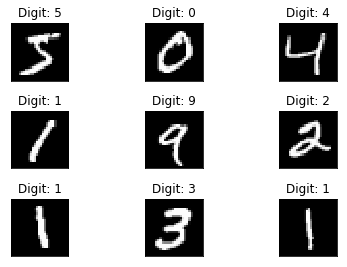

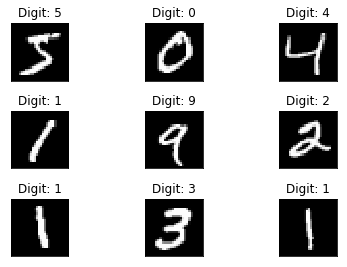

In [7]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

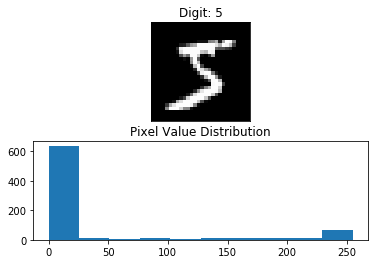

In [8]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
#fig

In [9]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [10]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [11]:
# one-hot encoding using keras' numpy-related utilities
num_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [25]:
num_epoch=10
batch_size=128

In [20]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))


In [23]:
# compiling the sequential model

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [26]:
hist = model.fit(X_train,Y_train,batch_size=batch_size, validation_data=(X_test,Y_test),epochs=num_epoch)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.2523 - acc: 0.9240 - val_loss: 0.1017 - val_acc: 0.9689
Epoch 2/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.1008 - acc: 0.9690 - val_loss: 0.0814 - val_acc: 0.9747
Epoch 3/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0734 - acc: 0.9776 - val_loss: 0.0681 - val_acc: 0.9785
Epoch 4/10
60000/60000 [==============================] - 19s 311us/step - loss: 0.0573 - acc: 0.9823 - val_loss: 0.0592 - val_acc: 0.9814
Epoch 5/10
60000/60000 [==============================] - 15s 250us/step - loss: 0.0468 - acc: 0.9857 - val_loss: 0.0635 - val_acc: 0.9789
Epoch 6/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.0407 - acc: 0.9864 - val_loss: 0.0656 - val_acc: 0.9812
Epoch 7/10
60000/60000 [==============================] - 16s 258us/step - loss: 0.0341 - acc: 0.9887 - val_loss: 0.

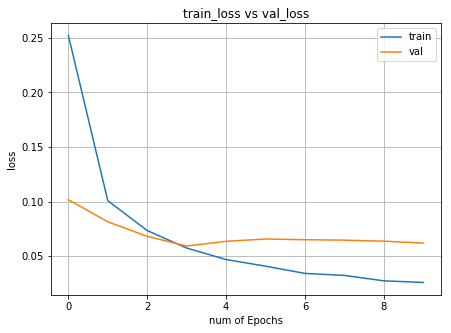

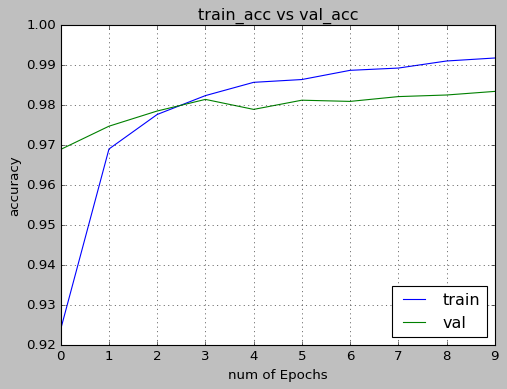

In [27]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

# to save figure
plt.savefig('loss_curve_nn_ex-2')

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
# to save figure
plt.savefig('acc_curve_nn_ex-2')

In [29]:
score = model.evaluate(X_test, Y_test)
print (score)
print ('loss:', score[0])
print ('acc: ', str(score[1]*100) + '%')

10000/10000 [==============================] - 3s 267us/step
[0.061905954551640024, 0.9834]
loss: 0.061905954551640024
acc:  98.34%


In [34]:
# Predict output probability
model.predict(X_test[10:11])

array([[1.0000000e+00, 1.4922816e-16, 2.1192992e-11, 6.5015200e-15,
        6.4704867e-17, 1.8850261e-15, 2.7190223e-12, 6.4157359e-14,
        3.4271416e-17, 2.8067423e-11]], dtype=float32)

In [35]:
Y_test[10:11]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
model.predict_classes(X_test[10:15])

array([0, 6, 9, 0, 1], dtype=int64)

In [40]:
from keras.models import load_model

In [41]:
model.save('nn_model_ex-2.h5')


In [42]:
loaded_model=load_model('nn_model_ex-2.h5')

In [43]:
model.predict_classes(X_test[10:15])

array([0, 6, 9, 0, 1], dtype=int64)

In [44]:
# model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total para

In [45]:
model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 784),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_7',
   'trainable': True,
   'units': 512,
   'use_bias': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'relu', 'name': 'activation_5', 'trainable': True}},
 {'class_name': 'Dropout',
  'config': {'name': 'dropout_5',
   'noise_shape': None,
   'rate': 0.2,
   'seed': None,
   'trainable': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Ze

In [46]:
len(model.layers)

7

In [47]:
model.layers[0].input_shape

(None, 784)

In [48]:
model.layers[0].output_shape

(None, 512)

In [49]:
model.layers[0].get_weights()

[array([[-0.02549247, -0.0561777 ,  0.05209912, ..., -0.06183227,
         -0.00908861,  0.06779422],
        [ 0.04426823, -0.0240855 , -0.04645399, ...,  0.06754445,
         -0.03559416, -0.00660289],
        [-0.0074223 , -0.015153  ,  0.01655174, ...,  0.00838462,
          0.06298107,  0.03588488],
        ...,
        [-0.02643666,  0.06150617, -0.04194537, ..., -0.03168401,
         -0.03064082, -0.00494707],
        [-0.01858226,  0.01891492, -0.03004561, ..., -0.04531915,
         -0.04203787,  0.03629566],
        [-0.05394345,  0.06112763,  0.01676226, ...,  0.01018767,
         -0.0668488 , -0.02252743]], dtype=float32),
 array([-4.61721048e-02, -1.85446087e-02,  8.94217752e-03,  4.51080082e-03,
         8.30880553e-02,  2.15552188e-03,  8.13759584e-03,  8.86285119e-03,
         1.19014554e-01, -9.58610885e-03,  4.51994874e-03, -4.64973822e-02,
        -2.15785094e-02,  3.76241952e-02, -2.72213351e-02, -7.14134127e-02,
         9.33719520e-03, -2.22345162e-03, -2.10913178e

In [50]:
wt = model.layers[0].get_weights()
#wt.shape
weights = wt[0]
bias = wt[1]
print ('weights_shape: ',wt[0].shape)
print ('bias_shape: ',wt[1].shape)

weights_shape:  (784, 512)
bias_shape:  (512,)


In [51]:
model.layers[0].trainable

True